In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

In [2]:
full_df = pd.read_csv('data.csv')

In [3]:
# Preview the data; 2894 rows x 174 columns
full_df

,game,date,away_team,away_score,mp_pg_away,fg_pg_away,fga_pg_away,fg%_pg_away,3p_pg_away,3pa_pg_away,...,ftr_lr_home,3par_lr_home,efg%_off_lr_home,tov%_off_lr_home,orb%_off_lr_home,ft/fga_off_lr_home,efg%_def_lr_home,tov%_def_lr_home,drb%_def_lr_home,ft/fga_def_lr_home
0,Game 1,May 31 2018,Cleveland Cavaliers,114,240.6,40.4,84.8,0.476,12.0,32.1,...,20,15,1,28,23,16,5,21,25,11
1,Game 2,Jun 3 2018,Cleveland Cavaliers,103,240.6,40.4,84.8,0.476,12.0,32.1,...,20,15,1,28,23,16,5,21,25,11
2,Game 3,Jun 6 2018,Golden State Warriors,110,240.6,42.8,85.1,0.503,11.3,28.9,...,8,4,3,11,27,6,28,26,17,2
3,Game 4,Jun 8 2018,Golden State Warriors,108,240.6,42.8,85.1,0.503,11.3,28.9,...,8,4,3,11,27,6,28,26,17,2
4,Game 1,May 13 2018,Cleveland Cavaliers,83,240.6,40.4,84.8,0.476,12.0,32.1,...,18,8,15,15,18,20,2,14,11,16
5,Game 2,May 15 2018,Cleveland Cavaliers,94,240.6,40.4,84.8,0.476,12.0,32.1,...,18,8,15,15,18,20,2,14,11,16
6,Game 3,May 19 2018,Boston Celtics,86,241.5,38.3,85.1,0.450,11.5,30.4,...,8,4,3,11,27,6,28,26,17,2
7,Game 4,May 21 2018,Boston Celtics,102,241.5,38.3,85.1,0.450,11.5,30.4,...,8,4,3,11,27,6,28,26,17,2
8,Game 5,May 23 2018,Cleveland Cavaliers,83,240.6,40.4,84.8,0.476,12.0,32.1,...,18,8,15,15,18,20,2,14,11,16
9,Game 6,May 25 2018,Boston Celtics,99,241.5,38.3,85.1,0.450,11.5,30.4,...,8,4,3,11,27,6,28,26,17,2


In [4]:
# Add column for score differential
# full_df['score_diff'] = full_df['home_score'] - full_df['away_score']
# Add column for winner
full_df['winner'] = (full_df['home_score'] - full_df['away_score'] > 0).astype(int)

In [5]:
# Replace "Game i" with "i"
full_df['game'] = full_df['game'].replace('Game ', '', regex=True)

In [6]:
# Drop dates for now until we can think of a way to engineer features
full_df = full_df.drop('date', axis=1)

In [7]:
"""
# Create map from team name to their alphabetic indices
teams = full_df['home_team'].unique().tolist()
# For now, just merge:
# NJ Nets -> BK Nets
# Supersonics -> Thunder
# NOLA Hornets -> Pelicans
# Bobcats -> Charlotte Hornets
# Kansas City -> Sacramento
# Bullets -> Wizards
merges = {'New Jersey Nets': 'Brooklyn Nets',
         'Seattle SuperSonics': 'Oklahoma City Thunder',
         'New Orleans Hornets': 'New Orleans Pelicans',
          'Charlotte Bobcats': 'Charlotte Hornets',
          'Kansas City Kings': 'Sacramento Kings',
          'Washington Bullets': 'Washington Wizards'
         }
for team in merges:
    teams.remove(team)
teams.sort()
team_to_index = {}
for i, team in enumerate(teams):
    team_to_index[team] = i
for old_team, new_team in merges.items():
    team_to_index[old_team] = team_to_index[new_team]
"""

"\n# Create map from team name to their alphabetic indices\nteams = full_df['home_team'].unique().tolist()\n# For now, just merge:\n# NJ Nets -> BK Nets\n# Supersonics -> Thunder\n# NOLA Hornets -> Pelicans\n# Bobcats -> Charlotte Hornets\n# Kansas City -> Sacramento\n# Bullets -> Wizards\nmerges = {'New Jersey Nets': 'Brooklyn Nets',\n         'Seattle SuperSonics': 'Oklahoma City Thunder',\n         'New Orleans Hornets': 'New Orleans Pelicans',\n          'Charlotte Bobcats': 'Charlotte Hornets',\n          'Kansas City Kings': 'Sacramento Kings',\n          'Washington Bullets': 'Washington Wizards'\n         }\nfor team in merges:\n    teams.remove(team)\nteams.sort()\nteam_to_index = {}\nfor i, team in enumerate(teams):\n    team_to_index[team] = i\nfor old_team, new_team in merges.items():\n    team_to_index[old_team] = team_to_index[new_team]\n"

In [8]:
# Replace teams with their indices
# full_df = full_df.replace({'home_team': team_to_index, 'away_team': team_to_index})
full_df = full_df.drop(['home_team', 'away_team'], axis=1)

In [9]:
# Make sure all columns are numeric
full_df = full_df.apply(pd.to_numeric)

In [10]:
# Extract X and y; need to drop the columns we used to calculate labels
X = full_df.drop(['winner', 'home_score', 'away_score'], axis=1).to_numpy()
X = scale(X)
y = full_df['winner'].to_numpy()

In [13]:
pca = PCA(n_components=10)

In [16]:
import seaborn as sns

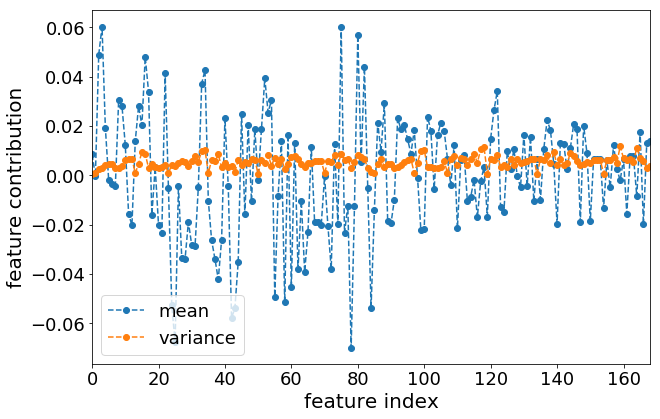

In [22]:
# https://github.com/jotterbach/Data-Exploration-and-Numerical-Experimentation/blob/master/Data-Analytics/PCA_Pitfalls.ipynb
# http://jotterbach.github.io/2016/03/24/Principal_Component_Analysis/

pca_data = pca.fit_transform(X)
pca_inv_data = pca.inverse_transform(np.eye(10))

fig = plt.figure(figsize=(10, 6.5))
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean')
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20);
plt.xlabel('feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
plt.xlim([0, 168])
plt.legend(loc='lower left', fontsize=18)

c:\users\jedia\.virtualenvs\cis-519-final-project-vymsm2a_\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


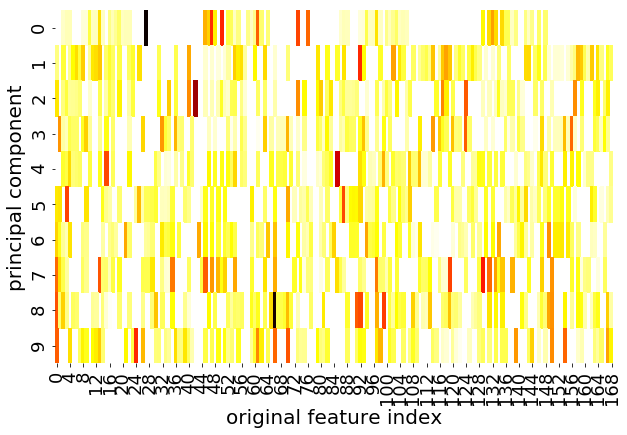

In [46]:
fig = plt.figure(figsize=(10, 6.5))
sns.heatmap(np.log(pca.inverse_transform(np.eye(10))), cmap="hot", cbar=False)
plt.ylabel('principal component', fontsize=20);
plt.xlabel('original feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);

In [37]:
new_cols = full_df.drop(['winner', 'home_score', 'away_score'], axis=1).columns

In [43]:
print(sorted([(i, round(v, 5), new_cols[i]) for i, v in enumerate(pca_inv_data.mean(axis=0))], key=lambda x: -abs(x[1])))

[(78, -0.06983, 'tov%_off_lr_away'), (25, -0.06763, 'fga_lr_away'), (3, 0.06033, 'fga_pg_away'), (75, 0.05996, 'ftr_lr_away'), (42, -0.05778, 'tov_lr_away'), (80, 0.0569, 'ft/fga_off_lr_away'), (43, -0.05378, 'pf_lr_away'), (84, -0.05362, 'ft/fga_def_lr_away'), (24, -0.05269, 'fg_lr_away'), (58, -0.05141, 'tov%_off_away'), (55, -0.04907, 'ftr_away'), (2, 0.04883, 'fg_pg_away'), (16, 0.048, 'trb_pg_away'), (60, -0.04529, 'ft/fga_off_away'), (82, 0.0438, 'tov%_def_lr_away'), (34, 0.04264, 'fta_lr_away'), (38, -0.04216, 'trb_lr_away'), (22, 0.04154, 'pts_pg_away'), (52, 0.03937, 'ortg_away'), (64, -0.03918, 'ft/fga_def_away'), (62, -0.03809, 'tov%_def_away'), (72, -0.03783, 'ortg_lr_away'), (33, 0.03723, 'ft_lr_away'), (44, -0.03496, 'pts_lr_away'), (122, 0.03414, 'trb_lr_home'), (17, 0.03399, 'ast_pg_away'), (37, -0.03387, 'drb_lr_away'), (28, -0.03383, '3pa_lr_away'), (27, -0.03331, '3p_lr_away'), (54, 0.03057, 'pace_away'), (8, 0.03041, '2p_pg_away'), (88, 0.02921, 'fg%_pg_home'), (31,

In [11]:
# We'll use these two metrics for now
scoring = {'accuracy': 'accuracy', 'f1': 'f1'}

In [75]:
clf = GradientBoostingClassifier(n_estimators=100)
scores = cross_validate(clf, X, y, cv=10, scoring=scoring)

In [77]:
res = clf.__class__.__name__ + ' ' + str([f'{key}: {scores[key].mean()} ± {scores[key].std()}' for key in ['test_accuracy', 'test_f1']])
print("Validation performance:")
print(res)

Validation performance:
GradientBoostingClassifier ['test_accuracy: 0.6433988513537616 ± 0.031011267613636616', 'test_f1: 0.7412746058353232 ± 0.0433750033076678']


In [98]:
# Try dropping all features except for:
cols = ['fg%_pg_away', 'fg%_pg_home', 'ft%_pg_away', 'ft%_pg_home', 'winner']
tiny_df = full_df[:1000][cols]
tiny_df = tiny_df.apply(pd.to_numeric)

In [99]:
# Extract X and y; need to drop the columns we used to calculate labels
X = tiny_df.drop(['winner'], axis=1).to_numpy()
X = scale(X)
y = tiny_df['winner'].to_numpy()

In [100]:
clf = MLPClassifier(hidden_layer_sizes=(3,), max_iter=1000, activation='logistic')
scores = cross_validate(clf, X, y, cv=10, scoring=scoring)

In [101]:
res = clf.__class__.__name__ + ' ' + str([f'{key}: {scores[key].mean()} ± {scores[key].std()}' for key in ['test_accuracy', 'test_f1']])
print("Validation performance:")
print(res)

Validation performance:
MLPClassifier ['test_accuracy: 0.656009300930093 ± 0.008391855823034533', 'test_f1: 0.7910410983584489 ± 0.002838264632038111']
